In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("cleaned_SuicideAndDepression_detection.csv")

In [6]:
df.head()
df['text'] = df['text'].astype(str)


# Visualization Suicide Vs Non-Suicide

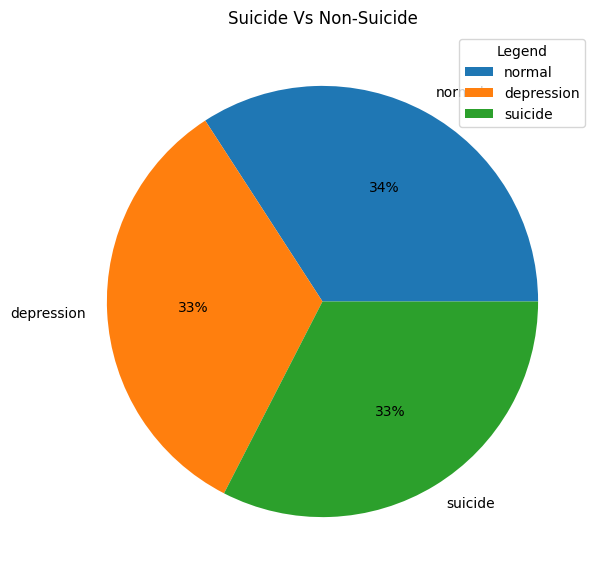

In [7]:
dfClass = df['class'].value_counts()
plt.figure(figsize = ((20,7)))
plt.pie(dfClass,labels = dfClass.index,autopct='%.0f%%')
plt.title('Suicide Vs Non-Suicide')
plt.legend(dfClass.index, title='Legend', loc='upper right')
plt.show()

# Word Frequency

In [9]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
# Tokenize using NLTK
corpus = [word_tokenize(text) for text in df['text']]

# Flatten the list of tokens
corpus_flat = [word for sublist in corpus for word in sublist]

# Compute word frequencies using NLTK's FreqDist
word_freq = FreqDist(corpus_flat)

# Convert FreqDist to DataFrame
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['word', 'count']).sort_values(by='count', ascending=False)



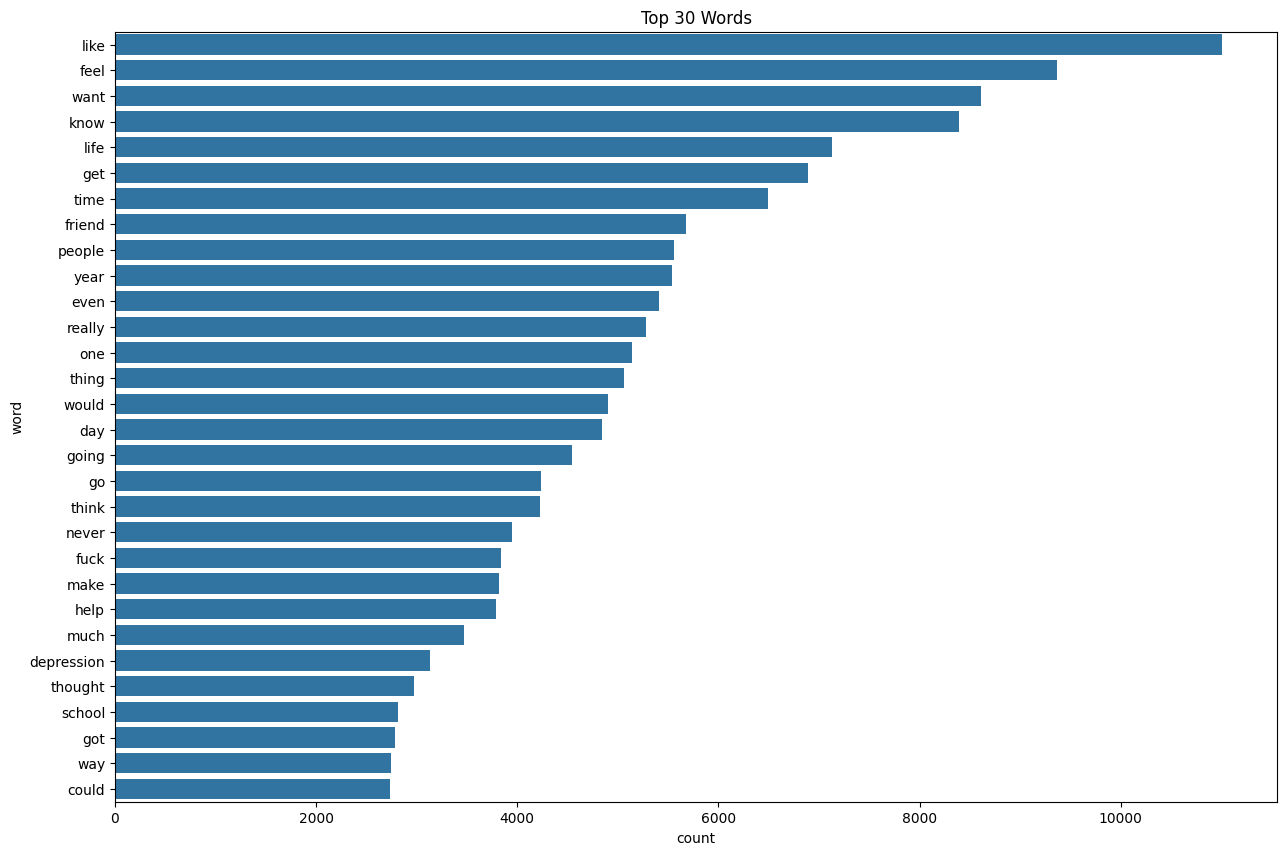

In [11]:
plt.figure(figsize=(15,10))
sns.barplot(x='count',y='word',data=word_freq_df.head(30))
plt.title('Top 30 Words')
plt.show()

# Word Cloud

In [12]:
from wordcloud import WordCloud
all_text = ' '.join(df['text'])
sucide_text = ' '.join(df.loc[df['class'] == 'suicide']['text'])
depression_text = ' '.join(df.loc[df['class'] == 'depression']['text'])
normal_text = ' '.join(df.loc[df['class'] == 'normal']['text'])


## Overall

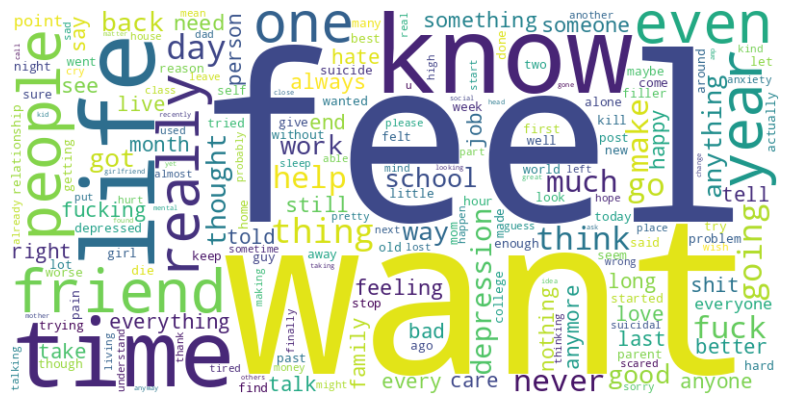

In [13]:
wordcloud = WordCloud(width=800, height=400, background_color='white',collocations=False).generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Suicide text

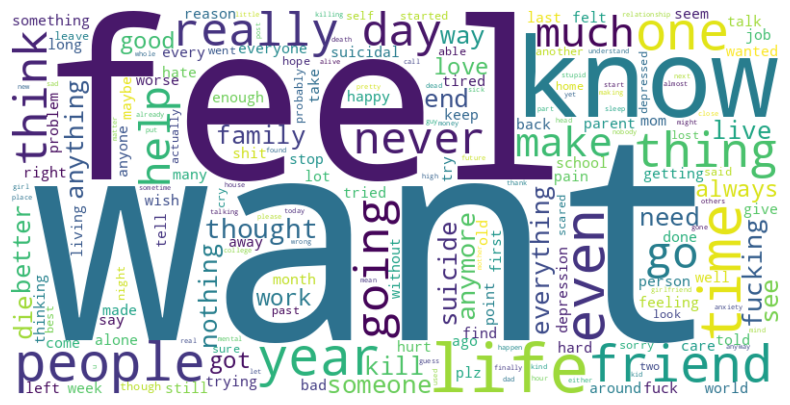

In [14]:
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(sucide_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Depression text

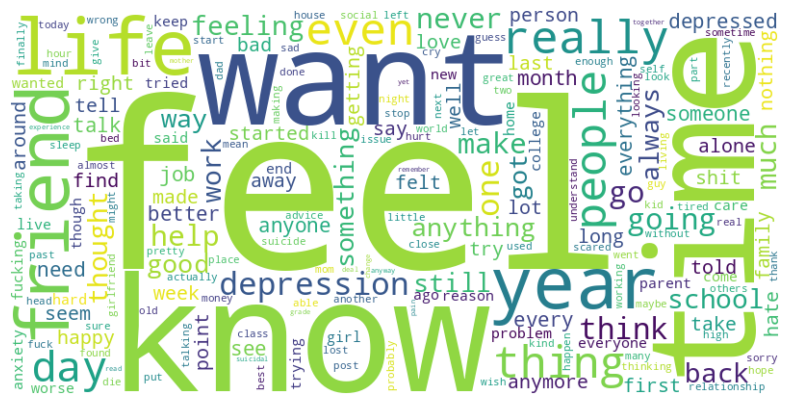

In [16]:
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(depression_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Normal text

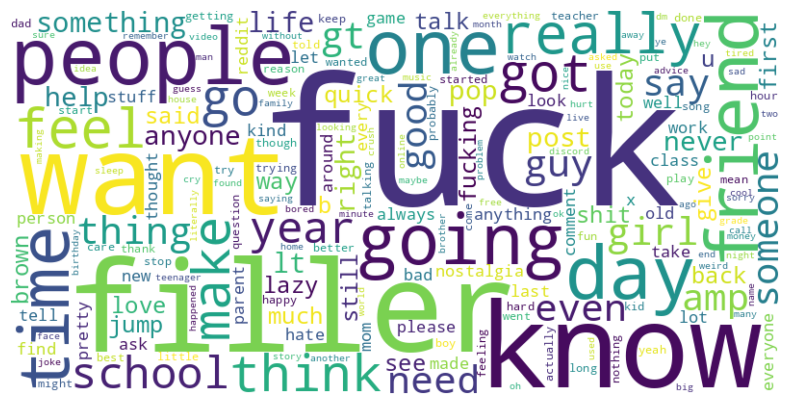

In [17]:
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(normal_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# N-Gram Exploration

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

In [22]:
def _get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                    for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]


## Bigram

<Axes: >

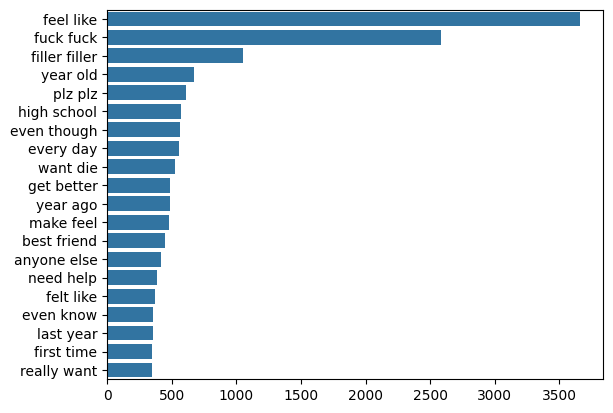

In [23]:
top_n_bigrams=_get_top_ngram(df['text'],2)
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

## Trigram

<Axes: >

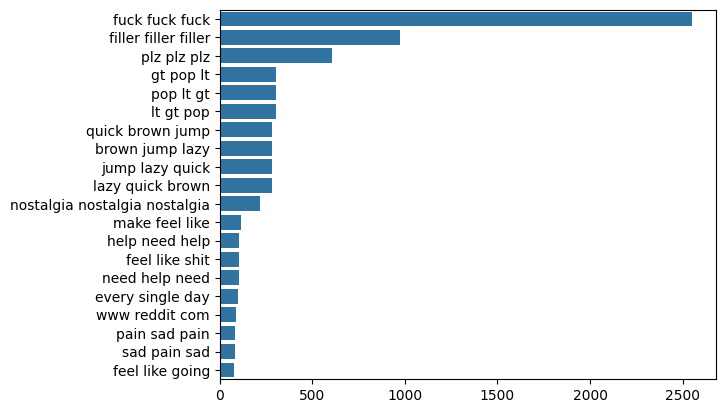

In [24]:
top_n_bigrams=_get_top_ngram(df['text'],3)
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)